In [4]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from RashbaJunction import RashbaJunction
from RashbaJunction.utilities import *
from RashbaJunction.ScatteringMatrix import ScatteringMatrix

ModuleNotFoundError: No module named 'RashbaJunction'

In [5]:
class RachbaJunction2(RachbaJunction):
    def __init__(self, argc, **kwarg):
        super().__init__(argc, kwarg)
            
    def omega_k(self, x, k, b):
        if self.E_so == 0:
            return np.array([1, 0], dtype=np.complex256)*np.exp(complex(0, k[1]*x))
        else:
            return super().omega_k(x, k, b)
        
    def omega_q(self, x, q, b):
        if self.E_so == 0:
            return np.array([0, 1], dtype=np.complex256)*np.exp(q[1]*x)
        else:
            return super().omega_q(x, q, b)

NameError: name 'RachbaJunction' is not defined

In [39]:
alp_r = 10

Eso_profile = [alp_r,0, -alp_r]

x_profile = [-1, 1]

junction = RachbaJunction2([x_profile, Eso_profile])


def g(ee, par):
    junction.interface = [0, par]    
    S = junction.get_scattering_matrix(ee)
    
#     junction.interface = [0, np.pi*np.sqrt(ee/E_l)]
#     S = junction.get_scattering_matrix(par/ee)
    
#     junction[0] = ee
#     junction[2] = -ee
#     S = junction.get_scattering_matrix(0)

    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef
    
# x = np.arange(0.55, 15, 0.11)
x = np.arange(-.5, .5, 0.011)

y = np.arange(0.001, 4*np.pi, 0.1)

res = make_grid(x, y, [g])

total_res = []

for i in res.keys():
    total_res.append(res[i][0])


total_res = np.array(total_res, dtype = np.float64)
print(total_res.shape)
print(x.shape)
print(y.shape)

(126, 91)
(91,)
(126,)


<IPython.core.display.Javascript object>


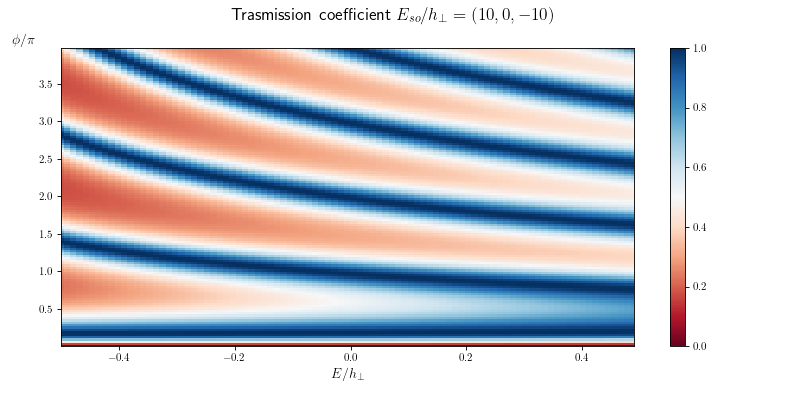

In [40]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 
                        figsize=(10, 5),
                        dpi=100,
                        tight_layout=True,
                        facecolor='white')

z_min, z_max = total_res.min(), total_res.max()

c = axs.pcolormesh(x, y/np.pi, total_res, cmap='RdBu', vmin=0, vmax=1, shading='auto')

axs.axis([x.min(), x.max(), y.min()/np.pi, y.max()/np.pi])

# axs.plot(x, np.full(len(x), 0.0631588608375565))

axs.set_xlabel(r"$E/h_\perp$", fontsize=13)

axs.set_ylabel(r"$\phi/ \pi$", loc = 'top', rotation=0, fontsize=13)

fig.colorbar(c, ax=axs)
fig.suptitle("Trasmission coefficient "r"$E_{so}/h_\perp = (10, 0 , -10)$", fontsize=16)
plt.savefig("2interface_transmission_density(inhomogeneous_h).pdf")
plt.show()

In [31]:
alp_r = 10
Eso_profile = [alp_r,0, -alp_r]

x_profile = [-1,0, 1]

junction = RachbaJunction2([x_profile, Eso_profile])


def g(ee, par):
    junction.interface = [0, par]
    S = junction.get_scattering_matrix(ee)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {parr}")
        return np.nan
    else:
        return S.t_coef
    
r = np.arange(-0.9999, .99999, 0.0011)

phi_lbl = [r"0.1", r"\frac{\pi}{4}", r"\pi", r"\frac{3}{2}\pi", r"10"]
eso = [0.1, np.pi/4, np.pi, 3*np.pi/2, 10]
phi_dct = {i: j for i, j in zip(eso, phi_lbl)}
print(phi_dct)

res = make_grid(r, eso, [g])

{0.1: '0.1', 0.7853981633974483: '\\frac{\\pi}{4}', 3.141592653589793: '\\pi', 4.71238898038469: '\\frac{3}{2}\\pi', 10: '10'}


<IPython.core.display.Javascript object>


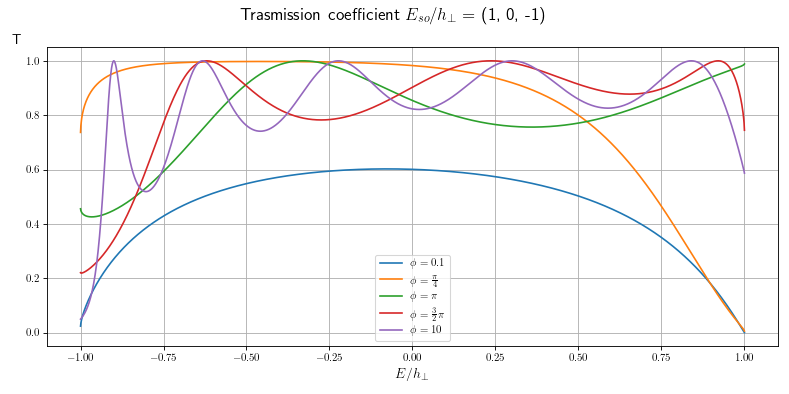

In [32]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs.plot(r, res[k][0], label=fr"$\phi = {phi_dct[k]}$")
    axs.set_xlabel(r"$E/h_\perp$", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
axs.grid(True)
axs.legend()

fig.suptitle("Trasmission coefficient "r"$E_{so}/h_\perp =$ "f"({junction[0]}, {junction[1]}, {junction[2]})", fontsize=16)
           
# plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_2interface_transmission.pdf", transparent = True)
plt.savefig("plots/2interface_transmission(inhomogeneous_h).pdf")
plt.show()

In [35]:
# L = 100e-9#m

# E_l  = np.pi**2*cc.hbar**2/(2*m*L**2)/ev_to_j

alp_r = 100
# Eso_profile = [-1, alp_r]
Eso_profile = [alp_r, 0, -alp_r]

x_profile = [0, 1]

junction = RachbaJunction2([x_profile, Eso_profile])


def g(ee, par):
#     junction.interface = [0, np.pi*np.sqrt(ee/E_l)]
    junction.interface = [0, ee]
    S = junction.get_scattering_matrix(par)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef
    
r = np.arange(0, 8, 0.011)
eso = np.array([0, .999, -.999])
res = make_grid(r, eso, [g])

<IPython.core.display.Javascript object>


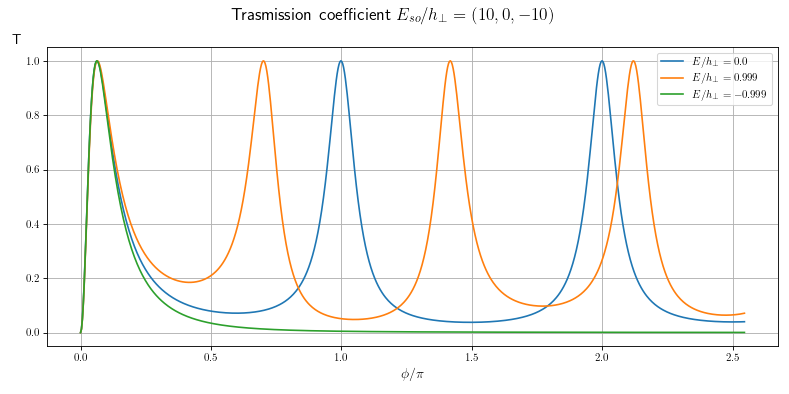

In [36]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

for j, k in enumerate(res.keys()):
    axs.plot(r/np.pi, res[k][0], label=fr"$E/h_\perp = {k}$")
    axs.set_xlabel(r"$\phi/\pi$", fontsize=13)
    axs.set_ylabel("T", loc = 'top', rotation=0, fontsize=13)
    
axs.grid(True)
axs.legend()

fig.suptitle("Trasmission coefficient "r"$E_{so}/h_\perp = (10, 0 , -10)$", fontsize=16)
            
# plt.savefig(BASE_PATH+SECTION_2+"Dirac_dilema_1interface_transmission.pdf", transparent = True)
# plt.savefig("Transmission_density_slice.pdf", transparent = True)
plt.show()

In [27]:
ee = 0
al_r = 10

alpha = [al_r, 0, -al_r]

phi = [.5, .06]
print(phi)

x_1 = -2
x_2 = 2
profile = [0, 1]

junction = RachbaJunction2([profile, alpha])
S = junction.get_scattering_matrix(ee)
M = junction.transfer_matrix_at(0, ee)


def t_region_WF(x, E, a = [1, 0]):
    # left part
    if x <= junction.interface[0]:
        junction.E_so = junction[0]
        wf = junction.get_WF(x, E)
        injected = a[0]*wf[:, 0]
        reflected = np.dot(S.C, np.array(a))[0]*wf[:, 1]
        evanescent = np.dot(S.C, np.array(a))[2]*wf[:, 2]
        res = injected + reflected + evanescent
    
    elif junction.interface[0] < x < junction.interface[1]:
        junction.E_so = junction[1]
        wf = junction.get_WF(x, E)
        
        coeff = np.dot(S.C, np.array(a))
        
        left_coeff = np.array([1, coeff[0], coeff[2], 0])
        
        res = np.dot(wf, np.dot(M, left_coeff))
        if np.isclose(x, 0, atol = 1e-3):
            print(f"{junction.interface[1]} absolure value {np.abs(np.dot(M, left_coeff))}")
            print(f"{junction.interface[1]} angle {np.angle(np.dot(M, left_coeff))/np.pi}")
    elif x > junction.interface[1]:
        junction.E_so = junction[2]    
        wf = junction.get_WF(x, E)

        injected = a[1]*wf[:, 1]
        reflected = np.dot(S.C, np.array(a))[1]*wf[:, 0]
        evanescent = np.dot(S.C, np.array(a))[3]*wf[:, 3]
        res = injected + reflected + evanescent
    return res

    

x_range = np.arange(x_1, x_2, 0.01)

total_wf1 = np.zeros((len(x_range), 2), dtype = np.complex256)
total_wf2 = np.zeros((len(x_range), 2), dtype = np.complex256)

res = {k: v for k, v in zip(phi, [total_wf1, total_wf2])}


for p in phi:
    junction.interface = [0, p]
    S = junction.get_scattering_matrix(ee)
    M = junction.transfer_matrix_at(0, ee)
    for j, xx in enumerate(x_range):
        r = t_region_WF(xx, ee)
        res[p][j] = r

[0.5, 0.06]
0.5 absolure value [1.68558088 0.89451336 1.27103853 1.02212111]
0.5 angle [ 0.08256496 -0.58525095  0.60027407 -0.26694116]
0.06 absolure value [2.07102818 1.08337667 1.78160964 1.48677463]
0.06 angle [ 0.01434903 -0.93640934  0.18167039 -0.99975009]


<IPython.core.display.Javascript object>


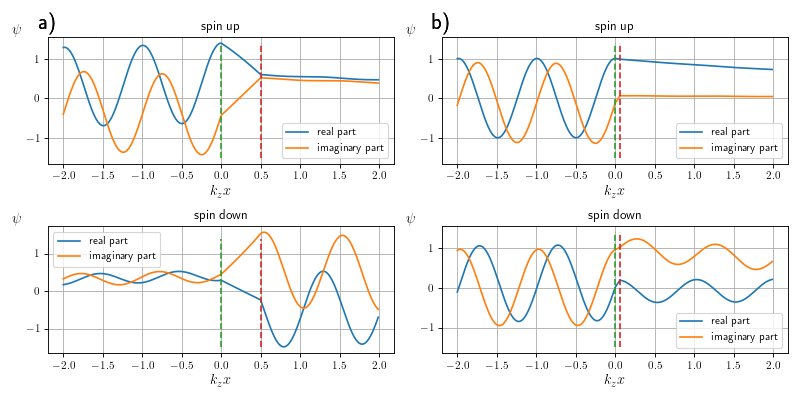

In [28]:
# %matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 5), dpi=100, tight_layout=True, facecolor='white')

y_int = np.arange(-1.5, 1.5, 0.1)

axs_title = ["spin up", "spin down"]
region_lbl = ["a)", "b)"]
for i, k in enumerate(res.keys()):
    for j in range(res[k].shape[1]):
        axs[j, i].plot(x_range, res[k][:, j].real, label="real part")
        axs[j, i].plot(x_range, res[k][:, j].imag, label="imaginary part")

        axs[j, i].plot(np.full(len(y_int), 0), [i for i in y_int], linestyle = "dashed")
        axs[j, i].plot(np.full(len(y_int), k), [i for i in y_int], linestyle = "dashed")
        
        axs[j, i].set_title(axs_title[j])
        
        axs[j, i].set_xlabel(r"$k_z x$", fontsize=13)
        axs[j, i].set_ylabel(r"$\psi$", loc = 'top', rotation=0, fontsize=13)
        axs[j, i].legend()
        axs[j, i].grid(True)

        axs[0, i].text(0, 1.1, region_lbl[i], fontsize=20, horizontalalignment='center', verticalalignment='center', transform=axs[0, i].transAxes)
    
# plt.savefig(BASE_PATH+SECTION_2+"2interface_wave_function.pdf", transparent = True)
plt.show()

In [18]:
alpha = [10, 0, -10]

profile = [0, 1]

junction = RachbaJunction2([profile, alpha])
# S = junction.get_scattering_matrix(ee)
# M = junction.transfer_matrix_at(0, ee)


junction.E_so = junction[1]
wf = junction.get_WF(0, 0)

print(wf)
print(junction.wave_length)

[[1.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 1.+0.j]]
[array([0., 1.]), array([-0., -1.]), array([0., 1.]), array([-0., -1.])]
